In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

warnings.filterwarnings('ignore')

/Users/jessekommandeur/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
def load_datasets(filepaths):
    df_list = []
    for filepath in filepaths:
        df = pd.read_csv(filepath)
        df_name = filepath.split('/')[-1].split('.')[0]
        df['Dataset'] = df_name
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

In [3]:
def anova_test_by_amino_acid_length(combined_data):
    # Perform ANOVA on the raw 'Amino Acids on Grid' values
    anova_results = {}
    grouped = combined_data.groupby('Amino Acid Length')
    for length, group in grouped:
        samples = [group['Recursions'][group['Dataset'] == dataset].values for dataset in group['Dataset'].unique()]
        if all(len(sample) > 1 for sample in samples):  # Ensure all groups have more than one observation
            f_value, p_value = stats.f_oneway(*samples)
            anova_results[length] = (f_value, p_value)
        else:
            anova_results[length] = (None, None)  # Insufficient data for ANOVA

    return anova_results

In [4]:
# List of dataset filenames
filenames = [
    '../Data/Experiment 3/HP50a.csv',
    '../Data/Experiment 3/HP50b.csv',
    '../Data/Experiment 3/HP50c.csv',
    '../Data/Experiment 3/HP50d.csv',
    '../Data/Experiment 3/HP50e.csv'
]

# Load and concatenate datasets
combined_df = load_datasets(filenames)
combined_df.tail()

,Amino Acid Length,Num Hydrophobic,Num Polar,1D protein,2D protein,Amino Acids on Grid,Trimmed 2D protein,Shape 2D protein,Amino Acid Order,H-Bonds,H-Ratio,Recursions,Time Taken (s),Dataset
49995,50,20,30,"['P', 'H', 'P', 'H', 'H', 'P', 'P', 'H', 'P', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,50,[['' 'H' 'P' 'H' 'P' '' '' '' '' '' '']\n ['P'...,"(15, 11)","[('P', (50, 50)), ('H', (50, 51)), ('P', (50, ...",3,0.06,2,1.192093e-06,HP50e
49996,50,28,22,"['H', 'H', 'H', 'H', 'P', 'P', 'H', 'H', 'H', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,50,[['' '' '' '' '' '' '' '' 'H' 'H' '' '' '' '' ...,"(9, 22)","[('H', (50, 50)), ('H', (49, 50)), ('H', (48, ...",2,0.04,1,9.536743e-07,HP50e
49997,50,29,21,"['P', 'H', 'H', 'H', 'H', 'P', 'P', 'P', 'H', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,50,[['' '' '' 'H' 'P' 'H' '' '' '' '' '']\n ['' '...,"(8, 11)","[('P', (50, 50)), ('H', (50, 51)), ('H', (49, ...",4,0.08,2,0.000000e+00,HP50e
49998,50,42,8,"['H', 'H', 'H', 'H', 'P', 'H', 'H', 'H', 'H', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,50,[['' '' '' '' '' 'H' '' '' '' '']\n ['' '' '' ...,"(12, 10)","[('H', (50, 50)), ('H', (50, 51)), ('H', (50, ...",12,0.24,0,0.000000e+00,HP50e
49999,50,19,31,"['H', 'P', 'P', 'P', 'H', 'H', 'P', 'P', 'P', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,50,[['' '' '' 'P' 'H' '' '' '' '' '' '' '' '' '']...,"(12, 14)","[('H', (50, 50)), ('P', (49, 50)), ('P', (49, ...",0,0.00,0,0.000000e+00,HP50e


In [5]:
# Perform the ANOVA tests and get the results
anova_results = anova_test_by_amino_acid_length(combined_df)

# Output the results
for length, (f_value, p_value) in anova_results.items():
    if f_value is not None and p_value is not None:
        print(f"Amino Acid Length {length}: F-Value = {f_value}, p-Value = {p_value}")
    else:
        print(f"Amino Acid Length {length}: Insufficient data for ANOVA")


Amino Acid Length 5: F-Value = nan, p-Value = nan
Amino Acid Length 10: F-Value = 0.5186426279025865, p-Value = 0.7220483734760952
Amino Acid Length 15: F-Value = 0.6515623322237736, p-Value = 0.6257444757109918
Amino Acid Length 20: F-Value = 2.4088632797194296, p-Value = 0.047180629511521875
Amino Acid Length 25: F-Value = 0.5195094370780473, p-Value = 0.7214112006224063
Amino Acid Length 30: F-Value = 0.47863945417604814, p-Value = 0.751467206063163
Amino Acid Length 35: F-Value = 0.8096861768546922, p-Value = 0.5187602070413133
Amino Acid Length 40: F-Value = 0.8907258690628251, p-Value = 0.4684619874703546
Amino Acid Length 45: F-Value = 1.1008411449062414, p-Value = 0.3542891525611525
Amino Acid Length 50: F-Value = 0.7869556909424767, p-Value = 0.5334584136716151


In [6]:
# Calculate the mean of non-NaN F-values and p-values
mean_f_value = np.nanmean([anova_results[length][0] for length in anova_results])
mean_p_value = np.nanmean([anova_results[length][1] for length in anova_results])

mean_f_value, mean_p_value

(0.9072695569851246, 0.5269801829031793)

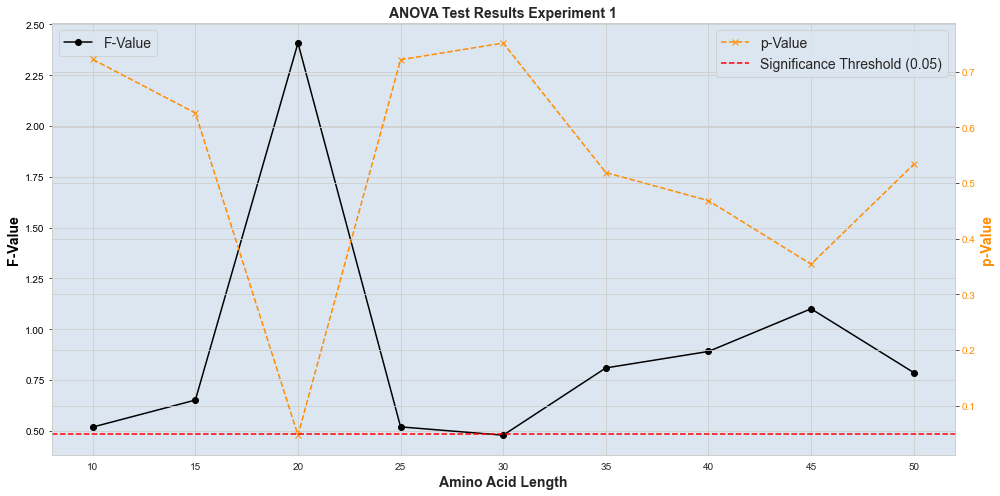

In [7]:
# Separate the results into F-values and p-values
f_values = [anova_results[length][0] for length in anova_results]
p_values = [anova_results[length][1] for length in anova_results]
lengths = list(anova_results.keys())

# Apply Seaborn style
sns.set_style("whitegrid", {"axes.facecolor": "#DCE6F1"})

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot F-values
color = 'Black'
ax1.set_xlabel('Amino Acid Length', fontsize=14, fontweight='bold')
ax1.set_ylabel('F-Value', color=color, fontsize=14, fontweight='bold')
ax1.plot(lengths, f_values, color=color, marker='o', label='F-Value')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'DarkOrange'
ax2.set_ylabel('p-Value', color=color, fontsize=14, fontweight='bold')
ax2.plot(lengths, p_values, color=color, marker='x', linestyle='--', label='p-Value')
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')


# Title and layout
plt.title('ANOVA Test Results Experiment 1', fontsize=14, fontweight='bold')
fig.tight_layout()

# Show the plot with legend
ax1.legend(loc='upper left', fontsize=14)
ax2.legend(loc='upper right', fontsize=14)

plt.show()